In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [3]:
# Determine if there are any outliers in the "ASK_AMT" column

# create a list of the values in the ASK_AMT column
ask_amounts = application_df["ASK_AMT"].values

 # Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(ask_amounts,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

potential_outliers = [amt for amt in ask_amounts if amt < lower_bound or amt > upper_bound]

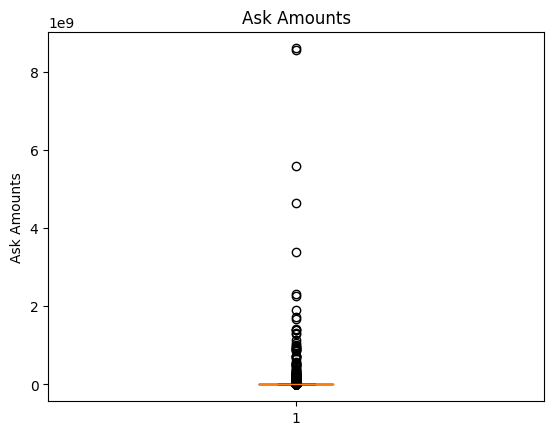

In [4]:
# Plot the ASK_AMT column data to visibly see outliers
fig1, ax1 = plt.subplots()
ax1.set_title('Ask Amounts')
ax1.set_ylabel('Ask Amounts')
ax1.boxplot(ask_amounts)
plt.show()

In [5]:
# Get summary statistics on the ask amt column
application_df["ASK_AMT"].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [6]:
# Get the length of the df before removing outliers
len(application_df)

34299

In [7]:
# Remove rows with outliers in the "ASK_AMT" column
application_df = application_df.loc[application_df["ASK_AMT"]<upper_bound]

In [8]:
# Get the length of the df after removing outliers, this does remove around 8000 rows of data
len(application_df)

26093

In [9]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE           12
AFFILIATION                 6
CLASSIFICATION             65
USE_CASE                    5
ORGANIZATION                4
STATUS                      2
INCOME_AMT                  9
SPECIAL_CONSIDERATIONS      2
ASK_AMT                   656
IS_SUCCESSFUL               2
dtype: int64

In [10]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts

T3     20086
T4      1331
T19      999
T5       894
T6       882
T8       669
T7       633
T10      508
T13       54
T9        18
T12       13
T2         6
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_type_counts[application_type_counts<500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       20086
T4        1331
T19        999
T5         894
T6         882
T8         669
T7         633
T10        508
Other       91
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    12557
C2000     4693
C1200     3997
C2100     1623
C3000     1537
         ...  
C1732        1
C1728        1
C4120        1
C1245        1
C2150        1
Name: CLASSIFICATION, Length: 65, dtype: int64

In [13]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    12557
C2000     4693
C1200     3997
Other     1686
C2100     1623
C3000     1537
Name: CLASSIFICATION, dtype: int64

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`

# Separate out the string data into a dataframe
string_data = application_df.select_dtypes(include='object')

# Apply get dummies to the string data
string_dummies = pd.get_dummies(string_data, drop_first=True, dtype=int)

# Merge the encoded data back into the application_df making sure to drop the original categorical columns
merged_df = application_df.merge(string_dummies, left_index=True, right_index=True)
merged_df = merged_df.drop(string_data, 1)
merged_df.head()

<ipython-input-14-f79a4a421f30>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  merged_df = merged_df.drop(string_data, 1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
5,1,5000,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Split our preprocessed data into our features and target arrays
y = merged_df["IS_SUCCESSFUL"].values
X = merged_df.drop("IS_SUCCESSFUL",1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

<ipython-input-15-4720ff6db3c8>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = merged_df.drop("IS_SUCCESSFUL",1).values


In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 25
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1850      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3396 (13.27 KB)
Trainable params: 3396 (13.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
612/612 [==============================] - 3s 2ms/step - loss: 0.5621 - accuracy: 0.7314
Epoch 2/100
612/612 [==============================] - 2s 3ms/step - loss: 0.5402 - accuracy: 0.7417
Epoch 3/100
612/612 [==============================] - 1s 2ms/step - loss: 0.5374 - accuracy: 0.7426
Epoch 4/100
612/612 [==============================] - 1s 2ms/step - loss: 0.5358 - accuracy: 0.7421
Epoch 5/100
612/612 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7447
Epoch 6/100
612/612 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7453
Epoch 7/100
612/612 [==============================] - 1s 2ms/step - loss: 0.5316 - accuracy: 0.7449
Epoch 8/100
612/612 [==============================] - 1s 2ms/step - loss: 0.5319 - accuracy: 0.7467
Epoch 9/100
612/612 [==============================] - 1s 2ms/step - loss: 0.5300 - accuracy: 0.7475
Epoch 10/100
612/612 [==============================] - 1s 2ms/step - loss: 0.5307 - accura

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 1s - loss: 0.5453 - accuracy: 0.7538 - 1s/epoch - 6ms/step
Loss: 0.5452747344970703, Accuracy: 0.7538319826126099


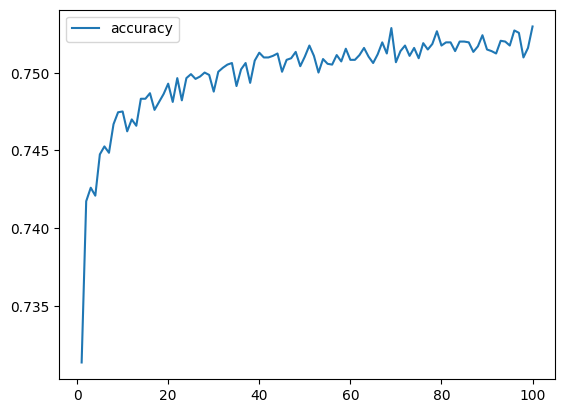

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy over epochs
history_df.plot(y="accuracy")
plt.show()